This example is from https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-multi-class-classification-e940f74bd899

In [1]:

# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
# read in the data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
df = pd.read_csv(url)

# shuffle the dataset! 
df = df.sample(frac=1).reset_index(drop=True)

In [3]:

# split into X and Y
Y = df['species']
X = df.drop(['species'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

(150, 4)
(150,)


In [5]:
# show Y
Y.head()

## 0        setosa
## 1     virginica
## 2    versicolor
## 3     virginica
## 4        setosa

0        setosa
1    versicolor
2    versicolor
3        setosa
4        setosa
Name: species, dtype: object

In [4]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

print(encoded_Y)
## array([0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2,
##        0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1,
##        2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0,
##        1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,
##        2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2,
##        1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1,
##        1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2])

print(dummy_y)
## array([[1., 0., 0.],
##        [0., 0., 1.],
##        [0., 1., 0.],
##             .
##             .
##             .
##        [1., 0., 0.],
##        [0., 1., 0.],
##        [0., 0., 1.]]

[0 1 1 0 0 2 0 0 1 0 2 2 2 2 2 1 1 1 0 1 1 0 0 0 2 0 0 1 1 2 0 0 1 0 2 0 1
 0 1 2 1 1 2 2 0 2 1 2 1 1 2 1 2 1 1 1 1 1 0 2 2 0 0 2 1 0 2 0 1 2 2 2 2 2
 1 0 1 0 0 2 2 1 2 0 0 2 1 2 2 1 2 1 2 0 2 2 0 0 2 1 0 2 1 0 1 0 1 0 2 0 1
 1 2 2 0 2 0 0 0 2 0 1 0 1 0 0 0 2 2 0 1 1 1 2 1 2 0 1 1 1 1 2 0 1 2 0 2 1
 2 0]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.

In [19]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [20]:
dummy_y.shape

(150, 3)

In [21]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
# es = keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                    mode='min',
#                                    patience=10, 
#                                    restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    # callbacks=[es],
                    epochs=100, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1.4061 - accuracy: 0.3500 - val_loss: 1.4029 - val_accuracy: 0.2667
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2763 - accuracy: 0.3500 - val_loss: 1.2978 - val_accuracy: 0.2667
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2084 - accuracy: 0.3500 - val_loss: 1.2255 - val_accuracy: 0.2667
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1577 - accuracy: 0.3500 - val_loss: 1.1758 - val_accuracy: 0.2667
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1181 - accuracy: 0.3500 - val_loss: 1.1334 - val_accuracy: 0.2667
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0796 - accuracy: 0.3500 - val_loss: 1.0957 - val_accuracy: 0.2667
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0435 - accuracy: 0.3500 - val_loss: 1.0536 - val_accuracy: 0.2667
Epoch 8/100


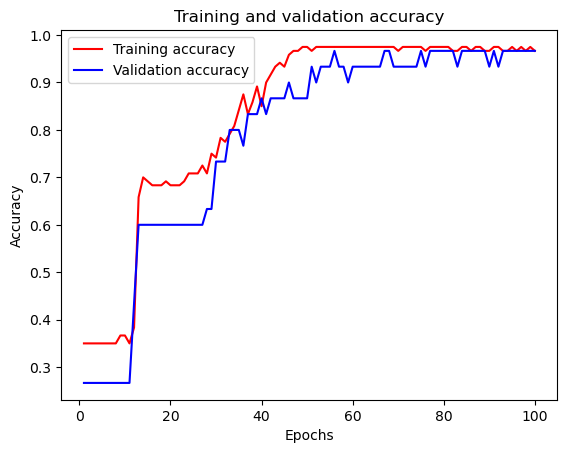

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
## array([[50,  0,  0],
##        [ 0, 46,  4],
##        [ 0,  1, 49]])


# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))
##               precision    recall  f1-score   support
## 
##            0       1.00      1.00      1.00        50
##            1       0.98      0.92      0.95        50
##            2       0.92      0.98      0.95        50
## 
##     accuracy                           0.97       150
##    macro avg       0.97      0.97      0.97       150
## weighted avg       0.97      0.97      0.97       150

5/5 [==============================] - 0s 2ms/step
[9.9904162e-01 9.5829909e-04 6.2984715e-09]
0.99999994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



---
# Example from ChatGPT

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the Iris dataset (you can replace this with your own dataset)
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target_names[iris.target]

# Encode the target variable
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# One-hot encode the target variable
y_one_hot = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = [round(x[2]) for x in y_pred_prob]  # Assuming 3 classes (0, 1, 2)

accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
classification_report_result = classification_report(y_test.argmax(axis=1), y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_result)


Epoch 1/50
12/12 [==============================] - 1s 27ms/step - loss: 1.3265 - accuracy: 0.3417 - val_loss: 1.3240 - val_accuracy: 0.3000
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 1.1998 - accuracy: 0.3417 - val_loss: 1.1987 - val_accuracy: 0.3000
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.1105 - accuracy: 0.3417 - val_loss: 1.1310 - val_accuracy: 0.3000
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0586 - accuracy: 0.3417 - val_loss: 1.0851 - val_accuracy: 0.3000
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0227 - accuracy: 0.3417 - val_loss: 1.0448 - val_accuracy: 0.3000
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.9905 - accuracy: 0.3417 - val_loss: 1.0099 - val_accuracy: 0.3000
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.9608 - accuracy: 0.3417 - val_loss: 0.9816 - val_accuracy: 0.3000
Epoch 8/50
12/12 [=

C:\Users\elder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\elder\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_pred

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0]